## **SECTION A**

## 1) FILL IN THE BLANKS

  a) **Error due to bias** is the difference between the average prediction of our model
and the correct value which we are trying to predict.

  b) **Variance** is the variability of model prediction for a given data point or a
value which tells us the spread of our data.

  c) **Overfitting** case model learns the details and noise in training data

  d) ** Under** fitting results in poor performance compared to **over** fitting.

  e) To reduce **over** fitting use regularization.

## 2) Give answer as per figure

  a)
  
      A- Overfitting case 

      B- Balanced case

      C- Underfitting case


# SECTION B

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [63]:
#Read the CSV dataset
data = pd.read_csv("https://raw.githubusercontent.com/EmmadiDivyaSrujana/Machine_Learning-basics/main/hearts.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [65]:
#Total number of rows and columns
data.shape

(303, 14)

In [66]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Analysing target variable**

1    165
0    138
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


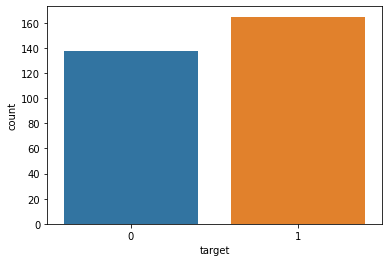

In [68]:
y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)

### **Analysing the 'Chest Pain Type' feature**

In [69]:
data["cp"].unique()

array([3, 2, 1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


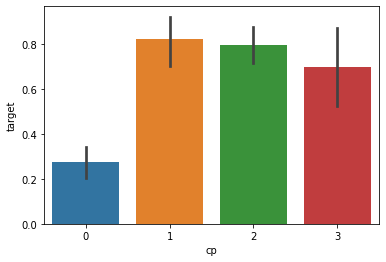

In [70]:
sns.barplot(data["cp"],y)

### **Analysing the Slope feature**


In [71]:
data["slope"].unique()

array([0, 2, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


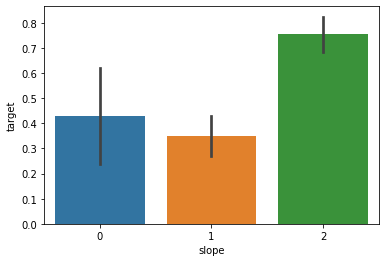

In [72]:
sns.barplot(data["slope"],y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


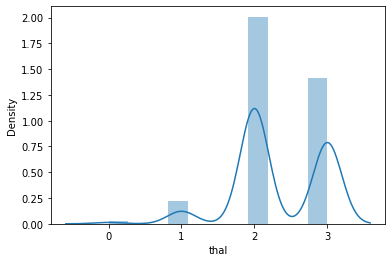

In [73]:
sns.distplot(data["thal"])

### **SPLITTING THE DATA INTO TESTING AND TRAINING DATA**

In [74]:

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [75]:
X_train.shape

(242, 13)

In [76]:
X_test.shape

(61, 13)

In [77]:
Y_train.shape

(242,)

In [78]:
Y_test.shape

(61,)

In [79]:
from sklearn.metrics import accuracy_score

### **LOGISTIC REGRESSION**

In [80]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1500)

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [81]:
Y_pred_lr.shape

(61,)

In [82]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
